In [43]:
!pip install selenium
!pip install nltk
!pip install Sastrawi

In [44]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time

import pandas as pd

import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import string

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [45]:
# nltk.download()

In [46]:
def scan_dynamic_site(url):
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--no-sandbox")

    try:
        driver = webdriver.Chrome(options=chrome_options)
        driver.get(url)
        time.sleep(3)  # Wait for JS to load content

        body_text = driver.find_element("tag name", "body").text.lower()
        return body_text

    except Exception as e:
        print(f"Error scanning {url}: {e}")
        return None

    finally:
      try:
        driver.quit()

      except:
        pass

In [ ]:
df_gambling = pd.read_csv('raw/gambling.csv')
df_normal = pd.read_csv('raw/normal.csv')

In [48]:
df_gambling = df_gambling.dropna(subset=['Link'])
df_gambling = df_gambling.drop_duplicates(subset=['Link'])

df_normal = df_normal.dropna(subset=['Link'])
df_normal = df_normal.drop_duplicates(subset=['Link'])

In [49]:
df_gambling['Scan'] = df_gambling['Link'].apply(scan_dynamic_site)

In [50]:
df_gambling = df_gambling.dropna(subset=['Scan'])
df_gambling = df_gambling.drop_duplicates(subset=['Scan'])
df_gambling.describe()

,Link,Scan
count,31,31
unique,31,31
top,https://yukrusia12.site,bhs indonesia\nlive chat\nversi mobile\nmasuk\...
freq,1,1


In [51]:
df_normal['Scan'] = df_normal['Link'].apply(scan_dynamic_site)

In [52]:
df_normal = df_normal.dropna(subset=['Scan'])
df_normal = df_normal.drop_duplicates(subset=['Scan'])
df_normal.describe()

,Link,Scan
count,40,40
unique,40,40
top,https://www.google.com,關於 google\ngoogle 商店\ngmail圖片\n登入\ngoogle 的其他語...
freq,1,1


In [53]:
print("Gambling DataFrame with scan results:")
df_gambling.head()

Gambling DataFrame with scan results:


,Link,Scan
0,https://yukrusia12.site,bhs indonesia\nlive chat\nversi mobile\nmasuk\...
1,https://qq828e5g.com,seo test\nlive chat\nwebsite access restricted...
7,https://scatterkoi.info,🚀putar untuk uji coba akun gacor\ntotal jackpo...
8,https://koko88.in,pilih server!\n [ 72.85.121.398 ] serve...
10,https://mansion77h.shop,mansion77h.shop\nverifying you are human. this...


In [54]:
print("\nNormal DataFrame with scan results:")
df_normal.head()


Normal DataFrame with scan results:


,Link,Scan
0,https://www.google.com,關於 google\ngoogle 商店\ngmail圖片\n登入\ngoogle 的其他語...
1,https://www.youtube.com,tw\nsign in\ntry searching to get started\nsta...
2,https://id.indeed.com,sign in\nrequest blocked\nyou have been blocke...
3,https://www.atlassian.com,sign in\njoin an exclusive digital event with ...
4,https://miro.com,"🚀 miro's biggest event of the year, canvas 25 ..."


In [55]:
stemmer = StemmerFactory().create_stemmer()
stopwords = StopWordRemoverFactory().get_stop_words()
punctuation = string.punctuation
num_words = ['nol', 'satu', 'dua', 'tiga', 'empat', 'lima', 'enam', 'tujuh', 'delapan', 'sembilan', 'sepuluh']

In [56]:
def preprocess_text(sentence):
    word_list = word_tokenize(sentence.lower())
    word_list = [word for word in word_list if word not in punctuation]
    word_list = [word for word in word_list if ((word not in num_words) and (word.isalpha()))]
    word_list = [stemmer.stem(word) for word in word_list if word not in stopwords]
    return ' '.join(word_list)

In [57]:
df_gambling['Cleaned'] = df_gambling['Scan'].apply(preprocess_text)

In [58]:
df_normal['Cleaned'] = df_normal['Scan'].apply(preprocess_text)

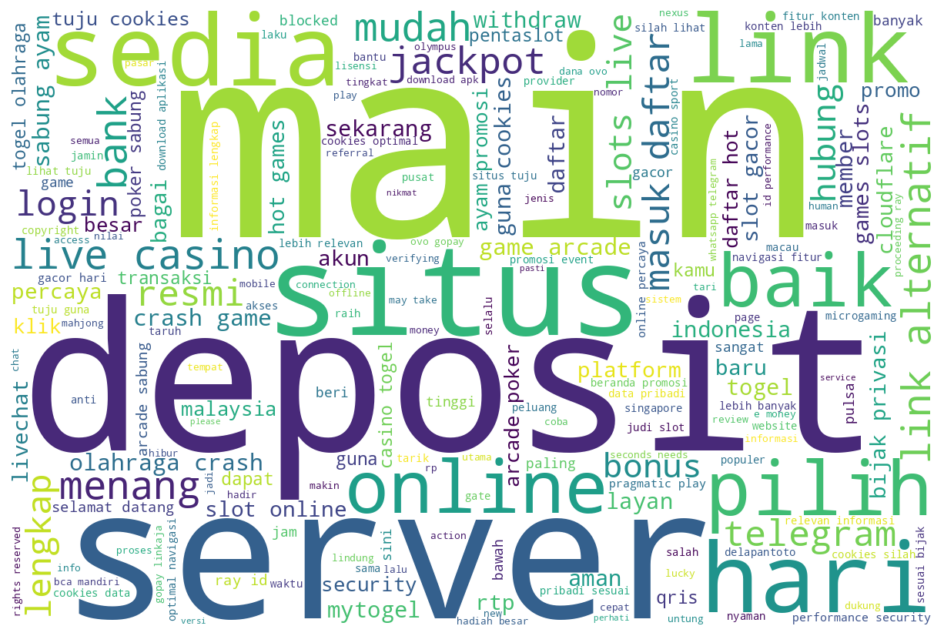

In [59]:
text_data_gambling = ' '.join(str(item) for item in df_gambling['Cleaned'])
wc_gambling = WordCloud(width=1200, height=800, max_words=200, background_color='white').generate(text_data_gambling)
plt.figure(figsize=(12, 8))
plt.imshow(wc_gambling, interpolation='bilinear')
plt.axis('off')
plt.show()

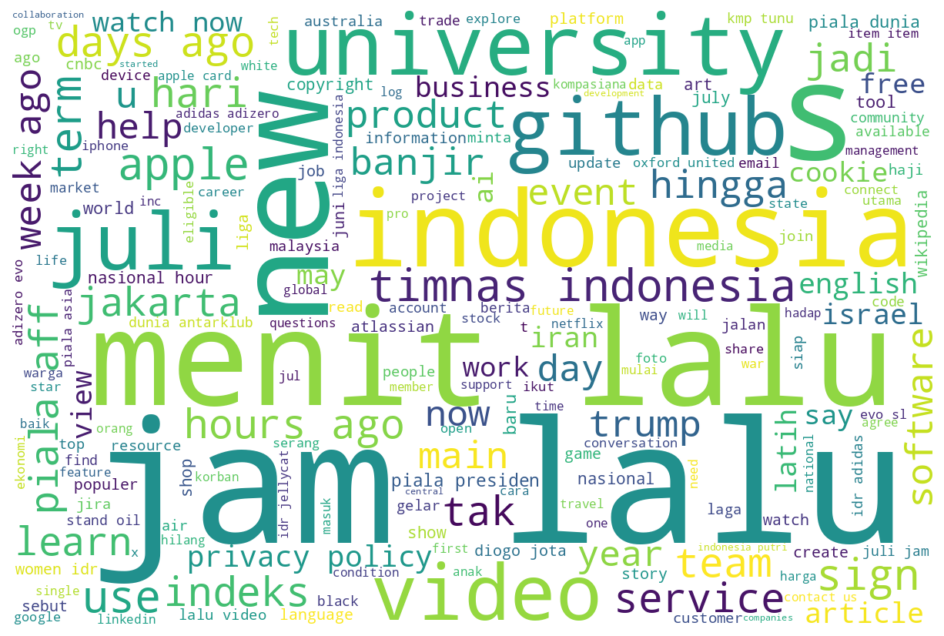

In [60]:
text_data_normal = ' '.join(str(item) for item in df_normal['Cleaned'])
wc_normal = WordCloud(width=1200, height=800, max_words=200, background_color='white').generate(text_data_normal)
plt.figure(figsize=(12, 8))
plt.imshow(wc_normal, interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
df_gambling["IsGamblingSite"] = 1
df_normal["IsGamblingSite"] = 0

In [62]:
df_combined = pd.concat([df_gambling, df_normal], ignore_index=True)
df_combined.to_csv("gambling_sites_dataset.csv", index=False)